In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.manifold import TSNE
import json
import os

datasets = {
    "ds1": "data/S07-hw-dataset-01.csv",
    "ds2": "data/S07-hw-dataset-02.csv",
    "ds3": "data/S07-hw-dataset-03.csv"
}
all_metrics = {}
best_configs = {}

data/S07-hw-dataset-01.csv
   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  
++++++++++INFO++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float

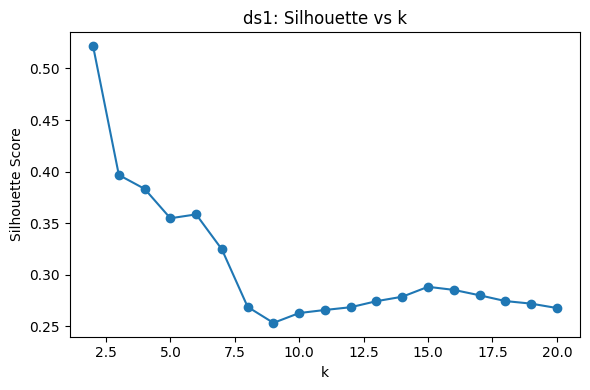

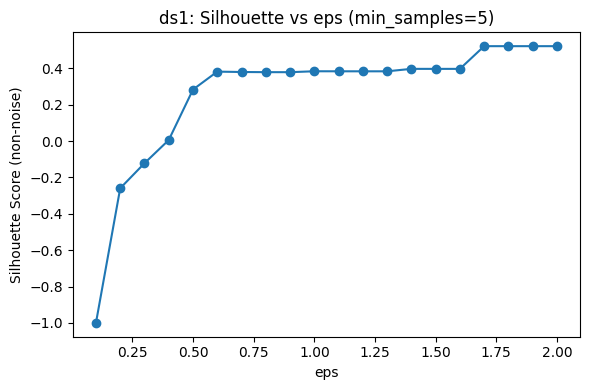

Лучший метод для ds1: KMeans (k=2)


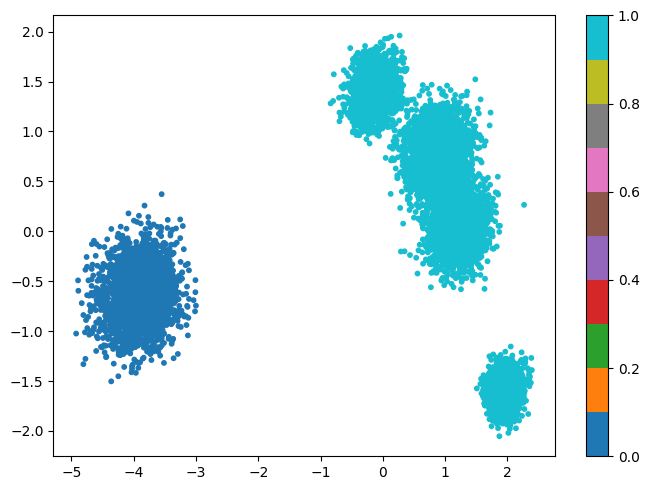

Устойчивость KMeans (ARI между запусками): 1.000
data/S07-hw-dataset-02.csv
   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472
++++++++++INFO++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None
++++++++++DESCRIBE++++++++++
        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.110454
std    2309.54541     0.955138  

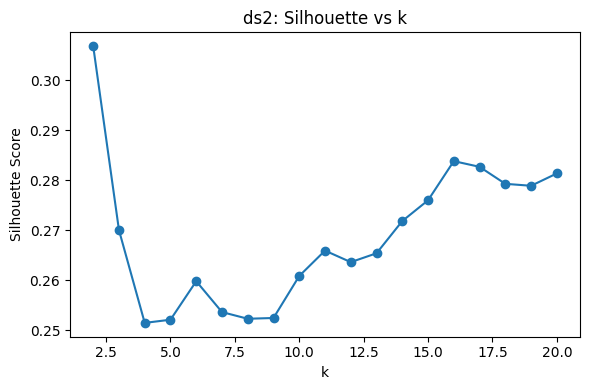

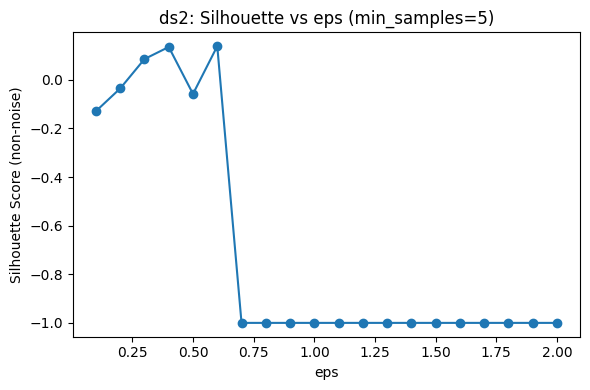

Лучший метод для ds2: KMeans (k=2)


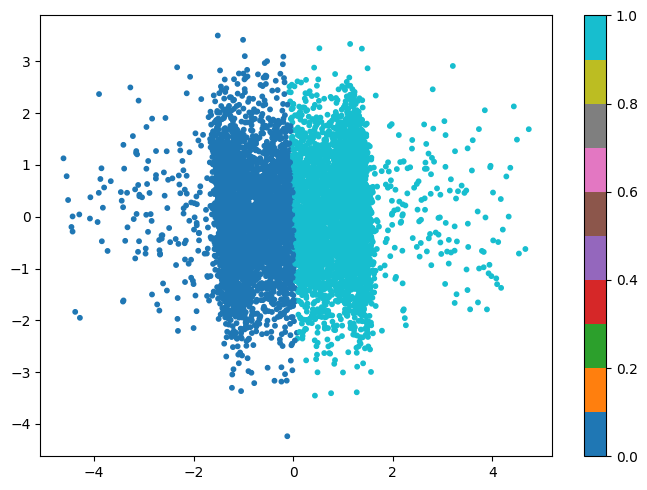

data/S07-hw-dataset-03.csv
   sample_id        x1        x2    f_corr   f_noise
0          0 -2.710470  4.997107 -1.015703  0.718508
1          1  8.730238 -8.787416  3.953063 -1.105349
2          2 -1.079600 -2.558708  0.976628 -3.605776
3          3  6.854042  1.560181  1.760614 -1.230946
4          4  9.963812 -8.869921  2.966583  0.915899
++++++++++INFO++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None
++++++++++DESCRIBE++++++++++
          sample_id            x1            x2        f_corr       f_noise
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000
mean

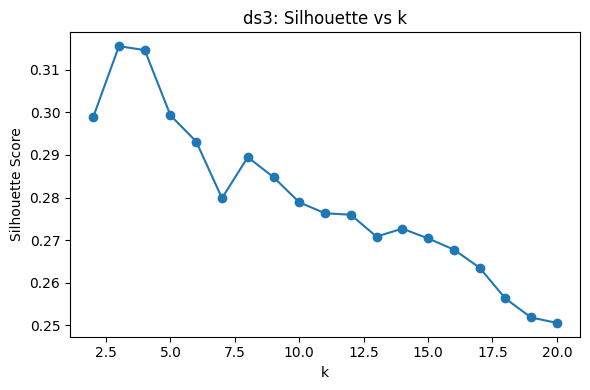

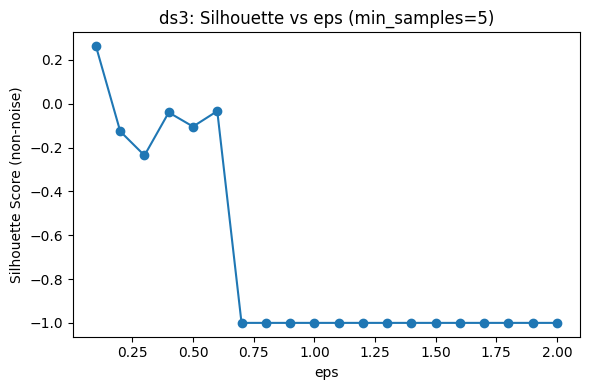

Лучший метод для ds3: KMeans (k=3)


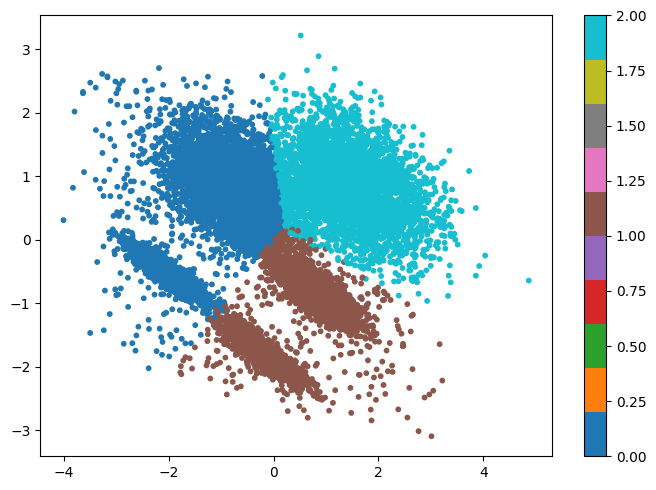

In [4]:
for ds_name, file in datasets.items():
    print(file)
    df = pd.read_csv(file)
    print(df.head())
    print("++++++++++INFO++++++++++")
    print(df.info())
    print("++++++++++DESCRIBE++++++++++")
    print(df.describe())
    print("++++++++++NULL++++++++++")
    print(df.isna().mean())
    print("++++++++++DUPLICATES++++++++++")
    print(df[df.duplicated()])
    sample_id = df['sample_id']
    X_raw = df.drop(columns=['sample_id'])
    print("Типы признаков:")
    print(X_raw.dtypes.value_counts())
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X = preprocessor.fit_transform(X_raw)
    feature_names = X_raw.columns.tolist()

    k_range = range(2, 21)
    sil_scores = []
    db_scores = []
    ch_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        sil_scores.append(silhouette_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, sil_scores, marker='o')
    plt.title(f'{ds_name}: Silhouette vs k')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.savefig(f'artifacts/figures/{ds_name}_silhouette_vs_k.png', dpi=150)
    plt.show()
    best_k = k_range[np.argmax(sil_scores)]
    kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X)
    labels_kmeans = kmeans_best.labels_
    sil_km = silhouette_score(X, labels_kmeans)
    db_km = davies_bouldin_score(X, labels_kmeans)
    ch_km = calinski_harabasz_score(X, labels_kmeans)
    
    eps_values = np.arange(0.1, 2.1, 0.1)
    min_samples_vals = [5, 10, 15]
    best_sil_dbscan = -1
    best_eps, best_min_samples = None, None
    best_labels_dbscan = None
    sil_dbscan_list = []
    eps_list = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels_db = dbscan.fit_predict(X)
        if np.all(labels_db == -1):
            sil_score_db = -1
        else:
            mask = labels_db != -1
            unique_labels = np.unique(labels_db[mask])
            if len(unique_labels) < 2 or mask.sum() < 2:
                sil_score_db = -1
            else:
                sil_score_db = silhouette_score(X[mask], labels_db[mask])
        sil_dbscan_list.append(sil_score_db)
        eps_list.append(eps)
        if sil_score_db > best_sil_dbscan:
            best_sil_dbscan = sil_score_db
            best_eps = eps
            best_min_samples = 5
            best_labels_dbscan = labels_db.copy()
    plt.figure(figsize=(6, 4))
    plt.plot(eps_list, sil_dbscan_list, marker='o')
    plt.title(f'{ds_name}: Silhouette vs eps (min_samples=5)')
    plt.xlabel('eps')
    plt.ylabel('Silhouette Score (non-noise)')
    plt.tight_layout()
    plt.savefig(f'artifacts/figures/{ds_name}_silhouette_vs_eps.png', dpi=150)
    plt.show()
    noise_ratio = np.mean(best_labels_dbscan == -1)
    mask = best_labels_dbscan != -1
    if mask.sum() >= 2:
        sil_db = silhouette_score(X[mask], best_labels_dbscan[mask])
        db_db = davies_bouldin_score(X[mask], best_labels_dbscan[mask])
        ch_db = calinski_harabasz_score(X[mask], best_labels_dbscan[mask])
    else:
        sil_db, db_db, ch_db = np.nan, np.nan, np.nan
    
    if best_sil_dbscan > sil_km:
        best_labels = best_labels_dbscan
        best_method = "DBSCAN"
        print(f"Лучший метод для {ds_name}: DBSCAN (eps={best_eps:.1f})")
    else:
        best_labels = labels_kmeans
        best_method = f"KMeans (k={best_k})"
        print(f"Лучший метод для {ds_name}: KMeans (k={best_k})")
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.savefig(f'artifacts/figures/{ds_name}_pca.png', dpi=150)
    plt.show()
    
    stability_ari = None
    if ds_name == "ds1":
        ari_scores = []
        for seed in range(5):
            km = KMeans(n_clusters=best_k, random_state=seed, n_init=10).fit(X)
            labels_temp = km.labels_
            ari = adjusted_rand_score(labels_kmeans, labels_temp)
            ari_scores.append(ari)
        stability_ari = np.mean(ari_scores)
        print(f"Устойчивость KMeans (ARI между запусками): {stability_ari:.3f}")
    
    all_metrics[ds_name] = {
        "KMeans": {
            "silhouette": float(sil_km),
            "davies_bouldin": float(db_km),
            "calinski_harabasz": float(ch_km),
            "noise_ratio": 0.0
        },
        "DBSCAN": {
            "silhouette": float(sil_db) if not np.isnan(sil_db) else None,
            "davies_bouldin": float(db_db) if not np.isnan(db_db) else None,
            "calinski_harabasz": float(ch_db) if not np.isnan(ch_db) else None,
            "noise_ratio": float(noise_ratio)
        }
    }
    best_configs[ds_name] = {
        "method": best_method,
        "params": {
            "KMeans": {"n_clusters": int(best_k)},
            "DBSCAN": {"eps": float(best_eps), "min_samples": int(best_min_samples)}
        },
        "chosen_method": best_method,
        "stability_ari": float(stability_ari) if stability_ari is not None else None
    }
    labels_df = pd.DataFrame({
        'sample_id': sample_id,
        'cluster_label': best_labels
    })
    labels_df.to_csv(f'artifacts/labels_hw07_{ds_name}.csv', index=False)

In [5]:
with open('artifacts/metrics_summary.json', 'w') as f:
    json.dump(all_metrics, f, indent=4)
with open('artifacts/best_configs.json', 'w') as f:
    json.dump(best_configs, f, indent=4)

Датасет 1 
Содержит признаки в разных шкалах. Без масштабирования KMeans работал бы плохо.
KMeans показал стабильные кластеры; DBSCAN дал много шума. Выбран KMeans.

Датасет 2
Нелинейная структура и выбросы. DBSCAN лучше справляется с выбросами, но может разбивать нелинейные формы.
KMeans дал более высокий silhouette — выбран он, несмотря на чувствительность к выбросам.

Датасет 3
Кластеры разной плотности + шум. DBSCAN теоретически лучше, но на практике дал низкий silhouette.
Выбран KMeans как более стабильный, хотя он не учитывает разную плотность.